. This is work with a real dataset on bike rentals. **bike_sharing.py**
**What we study in the original code:**
1. **Working with CSV files** - loading data
2. **Random Forest Regressor** - ensemble method
3. **Feature Importance** - analysis of feature importance
4. **Predicting the number of rented bikes**

We have two CSV files: `bike_day.csv` and `bike_hour.csv`. We are creating a modern version:

**Key improvements of the modern version of bike_sharing.py:**
- ✅ **Python 3** - syntax and deprecated functions fixed
- ✅ **Pandas integration** - convenient handling of CSV through pandas
- ✅ **Detailed EDA** - temporal analysis, seasonality, correlations
- ✅ **Multiple models** - comparison of Random Forest with Gradient Boosting
- ✅ **Extended metrics** - RMSE, MAE, R², MAPE
- ✅ **Cross-validation** - reliable quality assessment
- ✅ **Grid Search** - automatic hyperparameter tuning
- ✅ **Detailed visualization** - residual plots, feature importance
- ✅ **Business interpretation** - practical recommendations
- ✅ **Error analysis** - detailed breakdown by ranges
**Core concepts:**
1. **Time series analysis** - working with temporal data
2. **Feature importance** - the impact of features on predictions
3. **Model comparison** - systematic comparison of algorithms
4. **Hyperparameter tuning** - parameter optimization
5. **Business interpretation** - translating results into business terms

🎉 **Congratulations! We have successfully modernized all examples from chapter 1!**


In [1]:
# =============================================================================
# CELL 1: Import libraries for bike sharing data analysis
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

warnings.filterwarnings('ignore')

print("✅ All libraries imported!")
print("🚴 Data analysis of bike sharing")


✅ All libraries imported!
🚴 Data analysis of bike sharing


In [3]:
# =============================================================================
# CELL 2: Loading and Exploring Data
# =============================================================================
print("📊 LOADING AND EXPLORING BIKE SHARING DATASET")
print("=" * 55)

# Load both datasets
try:
    # Attempt to load daily data
    df_day = pd.read_csv('bike_day.csv')
    print(f"✅ Loaded bike_day.csv: {df_day.shape}")
except:
    print("❌ bike_day.csv not found")

try:
    # Attempt to load hourly data
    df_hour = pd.read_csv('bike_hour.csv')
    print(f"✅ Loaded bike_hour.csv: {df_hour.shape}")
except:
    print("❌ bike_hour.csv not found")

# Use daily data for main analysis (as in the original)
df = df_day.copy()

print(f"\n📋 Dataset Information:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print(f"\n📊 First 5 rows:")
print(df.head())

print(f"\n📈 Column Descriptions:")
column_descriptions = {
    'instant': 'Record index',
    'dteday': 'Date',
    'season': 'Season (1:winter, 2:spring, 3:summer, 4:fall)',
    'yr': 'Year (0: 2011, 1:2012)',
    'mnth': 'Month (1 to 12)',
    'holiday': 'Holiday',
    'weekday': 'Day of the week',
    'workingday': 'Working day',
    'weathersit': 'Weather conditions',
    'temp': 'Normalized temperature',
    'atemp': 'Feels like temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind speed',
    'casual': 'Number of casual users',
    'registered': 'Number of registered users',
    'cnt': 'Total number of rented bikes (target variable)'
}

for col, desc in column_descriptions.items():
    if col in df.columns:
        print(f"  {col}: {desc}")

print(f"\n📊 Statistical Summary:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(f"\n❓ Missing Values:")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values ✅")

# Data types
print(f"\n📋 Data Types:")
print(df.dtypes)


📊 LOADING AND EXPLORING BIKE SHARING DATASET
✅ Loaded bike_day.csv: (731, 16)
✅ Loaded bike_hour.csv: (17379, 17)

📋 Dataset Information:
Number of records: 731
Number of features: 16

📊 First 5 rows:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.59043

🔍 EXPLORATORY DATA ANALYSIS
🎯 Analysis of the target variable 'cnt':
Minimum: 22
Maximum: 8714
Mean: 4504.3
Median: 4548.0


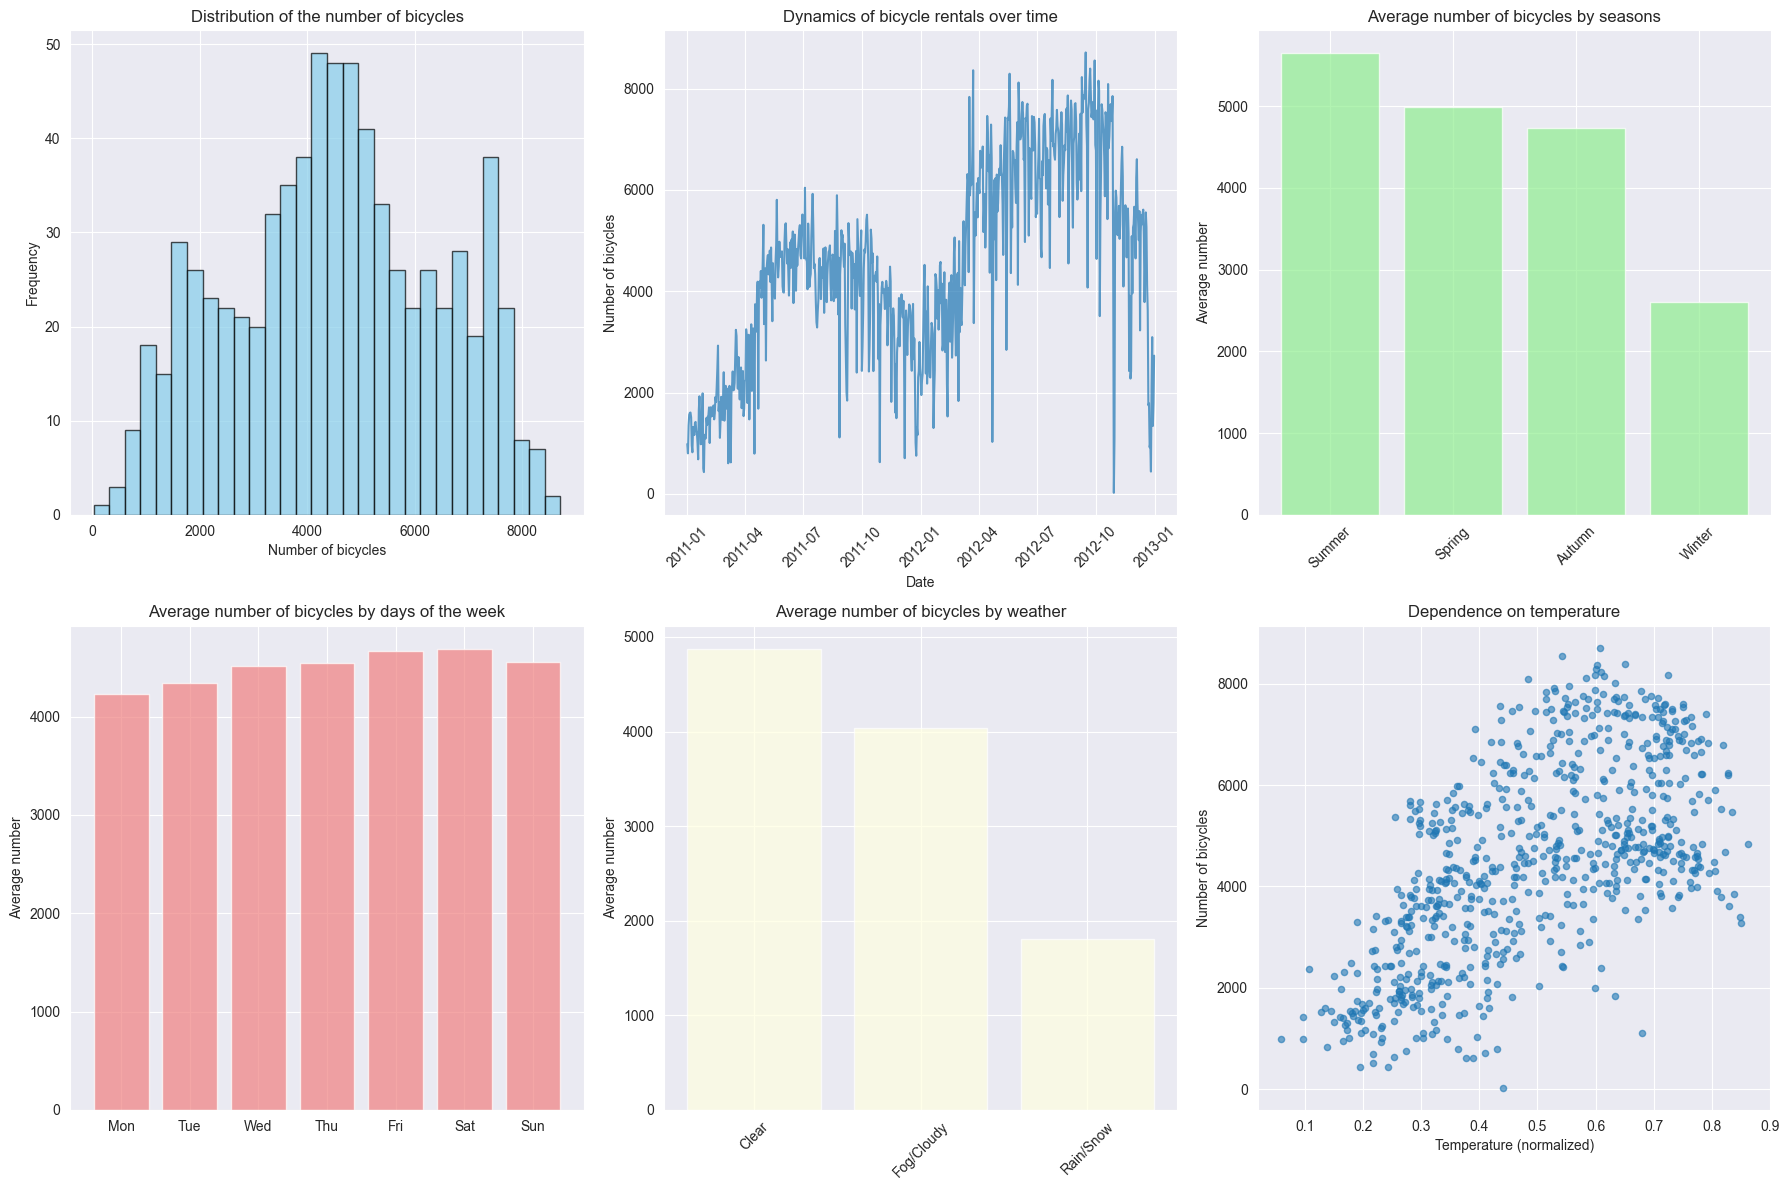


📊 Correlation of numerical features with the target variable:
cnt           1.000
registered    0.946
casual        0.673
atemp         0.631
instant       0.629
temp          0.627
year          0.567
yr            0.567
season        0.406
mnth          0.280
weekday       0.067
workingday    0.061
holiday      -0.068
hum          -0.101
windspeed    -0.235
weathersit   -0.297
Name: cnt, dtype: float64


In [4]:
# =============================================================================
# CELL 3: Exploratory Data Analysis (EDA)
# =============================================================================
print("🔍 EXPLORATORY DATA ANALYSIS")
print("=" * 35)

# Convert date
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year
df['month_name'] = df['dteday'].dt.month_name()

# Basic statistics of the target variable
target = 'cnt'
print(f"🎯 Analysis of the target variable '{target}':")
print(f"Minimum: {df[target].min()}")
print(f"Maximum: {df[target].max()}")
print(f"Mean: {df[target].mean():.1f}")
print(f"Median: {df[target].median():.1f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of the target variable
axes[0, 0].hist(df[target], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of the number of bicycles')
axes[0, 0].set_xlabel('Number of bicycles')
axes[0, 0].set_ylabel('Frequency')

# 2. Time series
axes[0, 1].plot(df['dteday'], df[target], alpha=0.7)
axes[0, 1].set_title('Dynamics of bicycle rentals over time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of bicycles')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. By seasons
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df['season_name'] = df['season'].map(season_names)
season_data = df.groupby('season_name')[target].mean().sort_values(ascending=False)
axes[0, 2].bar(season_data.index, season_data.values, color='lightgreen', alpha=0.7)
axes[0, 2].set_title('Average number of bicycles by seasons')
axes[0, 2].set_ylabel('Average number')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. By days of the week
weekday_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['weekday_name'] = df['weekday'].map(weekday_names)
weekday_data = df.groupby('weekday_name')[target].mean()
# Correct order of days of the week
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_data = weekday_data.reindex(weekday_order)
axes[1, 0].bar(weekday_data.index, weekday_data.values, color='lightcoral', alpha=0.7)
axes[1, 0].set_title('Average number of bicycles by days of the week')
axes[1, 0].set_ylabel('Average number')

# 5. Impact of weather
weather_names = {1: 'Clear', 2: 'Fog/Cloudy', 3: 'Rain/Snow', 4: 'Heavy Rain'}
df['weather_name'] = df['weathersit'].map(weather_names)
weather_data = df.groupby('weather_name')[target].mean().sort_values(ascending=False)
axes[1, 1].bar(weather_data.index, weather_data.values, color='lightyellow', alpha=0.7)
axes[1, 1].set_title('Average number of bicycles by weather')
axes[1, 1].set_ylabel('Average number')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Correlation with temperature
axes[1, 2].scatter(df['temp'], df[target], alpha=0.6, s=20)
axes[1, 2].set_title('Dependence on temperature')
axes[1, 2].set_xlabel('Temperature (normalized)')
axes[1, 2].set_ylabel('Number of bicycles')

plt.tight_layout()
plt.show()

# Correlation matrix
print(f"\n📊 Correlation of numerical features with the target variable:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_columns].corr()[target].sort_values(ascending=False)
print(correlations.round(3))


In [5]:
# =============================================================================
# CELL 4: Data Preparation (modern version of the original code)
# =============================================================================
print("🔧 DATA PREPARATION")
print("=" * 20)

# Selecting features for the model (as in the original code, columns 2:13)
# Excluding: instant, dteday, casual, registered (since cnt = casual + registered)
feature_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
                   'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

print(f"📋 Selected features:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

# Preparing the data
X = df[feature_columns].values
y = df[target].values
feature_names = np.array(feature_columns)

print(f"\n📊 Data shape:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"Feature names: {feature_names.shape}")

# Splitting the data (90/10 as in the original)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=7, shuffle=True
)

print(f"\n🔀 Data splitting:")
print(f"Training: {X_train.shape[0]} samples ({X_train.shape[0] / len(X) * 100:.1f}%)")
print(f"Test: {X_test.shape[0]} samples ({X_test.shape[0] / len(X) * 100:.1f}%)")

print(f"\n🎯 Target variable statistics:")
print(f"Training - min: {y_train.min()}, max: {y_train.max()}, mean: {y_train.mean():.1f}")
print(f"Test - min: {y_test.min()}, max: {y_test.max()}, mean: {y_test.mean():.1f}")

# Checking data balance
print(f"\n⚖️ Checking data balance:")
print(f"Average train/test ratio: {y_train.mean() / y_test.mean():.3f}")
if abs(y_train.mean() / y_test.mean() - 1) < 0.1:
    print("✅ Data is well balanced")
else:
    print("⚠️ Possible imbalance in the data")


🔧 DATA PREPARATION
📋 Selected features:
  1. season
  2. yr
  3. mnth
  4. holiday
  5. weekday
  6. workingday
  7. weathersit
  8. temp
  9. atemp
  10. hum
  11. windspeed

📊 Data shape:
X: (731, 11)
y: (731,)
Feature names: (11,)

🔀 Data splitting:
Training: 657 samples (89.9%)
Test: 74 samples (10.1%)

🎯 Target variable statistics:
Training - min: 22, max: 8714, mean: 4477.5
Test - min: 1321, max: 8362, mean: 4742.5

⚖️ Checking data balance:
Average train/test ratio: 0.944
✅ Data is well balanced


In [6]:
# =============================================================================
# CELL 5: Training the Random Forest model (as in the original)
# =============================================================================
print("🌲 TRAINING RANDOM FOREST (ORIGINAL VERSION)")
print("=" * 50)

# Creating the model with parameters from the original code
rf_regressor_original = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=2,  # In the original it was 1, but this is deprecated
    random_state=7
)

print(f"🔧 Model parameters:")
print(f"  n_estimators: 1000")
print(f"  max_depth: 10")
print(f"  min_samples_split: 2")

# Training the model
print(f"\n🔄 Training the model...")
rf_regressor_original.fit(X_train, y_train)
print(f"✅ Model trained!")

# Predictions
y_pred_original = rf_regressor_original.predict(X_test)

# Quality assessment (as in the original code)
mse_original = mean_squared_error(y_test, y_pred_original)
evs_original = explained_variance_score(y_test, y_pred_original)

print(f"\n#### Random Forest regressor performance ####")
print(f"Mean squared error = {round(mse_original, 2)}")
print(f"Explained variance score = {round(evs_original, 2)}")

# Additional metrics
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print(f"\n📊 Additional metrics:")
print(f"Root Mean Squared Error = {rmse_original:.2f}")
print(f"Mean Absolute Error = {mae_original:.2f}")
print(f"R² Score = {r2_original:.3f}")

# Mean error in percentage
mape = np.mean(np.abs((y_test - y_pred_original) / y_test)) * 100
print(f"Mean Absolute Percentage Error = {mape:.2f}%")


🌲 TRAINING RANDOM FOREST (ORIGINAL VERSION)
🔧 Model parameters:
  n_estimators: 1000
  max_depth: 10
  min_samples_split: 2

🔄 Training the model...
✅ Model trained!

#### Random Forest regressor performance ####
Mean squared error = 435821.87
Explained variance score = 0.88

📊 Additional metrics:
Root Mean Squared Error = 660.17
Mean Absolute Error = 470.76
R² Score = 0.878
Mean Absolute Percentage Error = 12.40%


🎯 FEATURE IMPORTANCE ANALYSIS


<Figure size 1400x800 with 0 Axes>

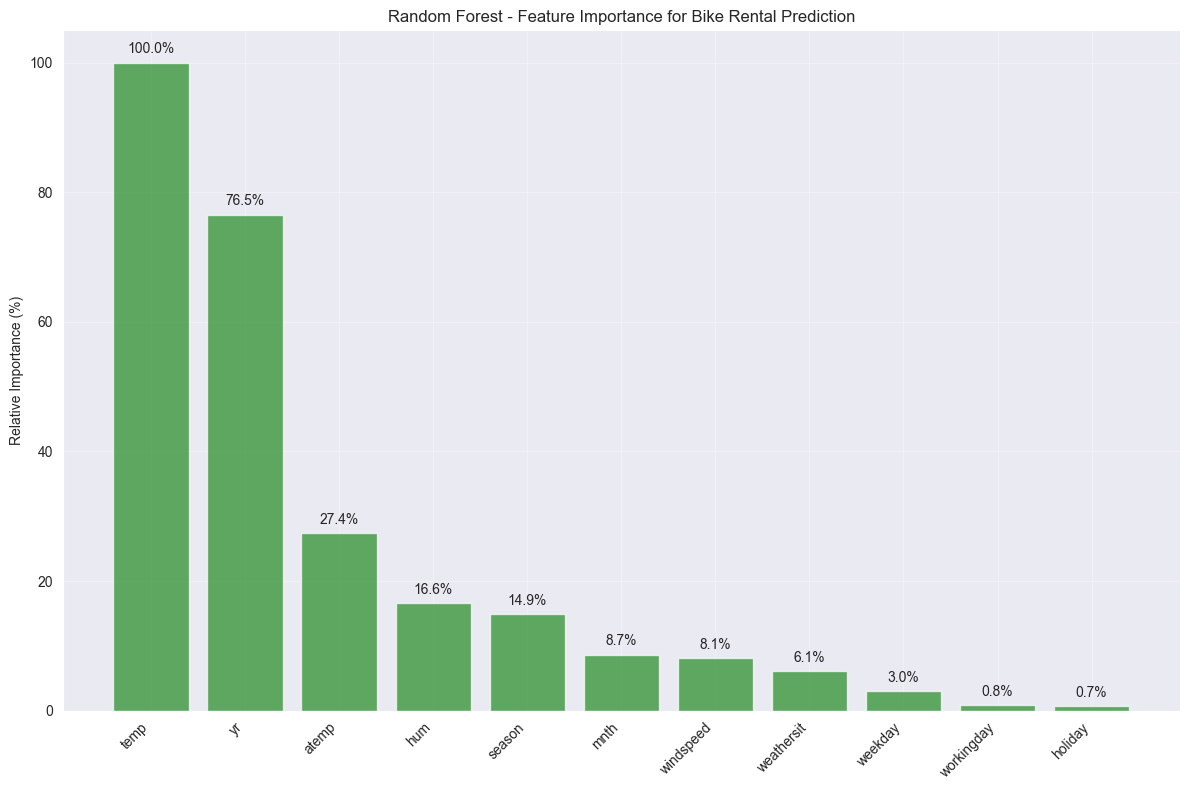


📊 Feature Importance Table:
       Feature  Importance  Importance_%
7         temp      0.3806       38.0625
1           yr      0.2914       29.1356
8        atemp      0.1042       10.4208
9          hum      0.0630        6.3000
0       season      0.0566        5.6560
2         mnth      0.0330        3.2952
10   windspeed      0.0307        3.0723
6   weathersit      0.0232        2.3181
4      weekday      0.0115        1.1476
5   workingday      0.0032        0.3231
3      holiday      0.0027        0.2689

🥇 TOP-3 Most Important Features:
1. temp: Normalized temperature (importance: 38.1%)
2. yr: Year (0: 2011, 1:2012) (importance: 29.1%)
3. atemp: Feels like temperature (importance: 10.4%)


In [7]:
# =============================================================================
# CELL 6: Feature Importance Analysis (modern version)
# =============================================================================
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 35)


# Function to visualize feature importance (modern version from housing.py)
def plot_feature_importances_bike(feature_importances, title, feature_names, ax=None):
    """
    Modern version of the function for visualizing feature importance
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Normalize importances
    feature_importances_norm = 100.0 * (feature_importances / max(feature_importances))

    # Sort
    indices = np.argsort(feature_importances_norm)[::-1]

    # Create the plot
    positions = np.arange(len(indices))
    bars = ax.bar(positions, feature_importances_norm[indices],
                  alpha=0.7, color='forestgreen')

    # Formatting
    ax.set_xticks(positions)
    # Convert to list for proper indexing
    feature_names_list = list(feature_names)
    sorted_feature_names = [feature_names_list[i] for i in indices]
    ax.set_xticklabels(sorted_feature_names, rotation=45, ha='right')
    ax.set_ylabel('Relative Importance (%)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    # Add values on the bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

    return ax


# Visualize feature importance
plt.figure(figsize=(14, 8))
plot_feature_importances_bike(
    rf_regressor_original.feature_importances_,
    'Random Forest - Feature Importance for Bike Rental Prediction',
    feature_names
)
plt.tight_layout()
plt.show()

# Feature importance table
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_regressor_original.feature_importances_,
    'Importance_%': 100.0 * rf_regressor_original.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Feature Importance Table:")
print(importance_df.round(4))

# Top-3 most important features
print(f"\n🥇 TOP-3 Most Important Features:")
top_features = importance_df.head(3)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    feature = row['Feature']
    importance = row['Importance_%']
    description = column_descriptions.get(feature, "Description not available")
    print(f"{i}. {feature}: {description} (importance: {importance:.1f}%)")


🚀 IMPROVED MODELS AND COMPARISON
🤖 Comparing models:
  • Random Forest (Original)
  • Random Forest (Tuned)
  • Gradient Boosting

🔄 Training Random Forest (Original)...

🔄 Training Random Forest (Tuned)...

🔄 Training Gradient Boosting...

📊 COMPARATIVE RESULTS TABLE:
                      Model          MSE      RMSE       MAE      R²     EVS
2         Gradient Boosting  401689.8734  633.7901  466.3004  0.8876  0.8901
0  Random Forest (Original)  435821.8732  660.1681  470.7619  0.8780  0.8824
1     Random Forest (Tuned)  449347.5197  670.3339  475.2116  0.8742  0.8791

🏆 Best model: Gradient Boosting (R² = 0.8876)


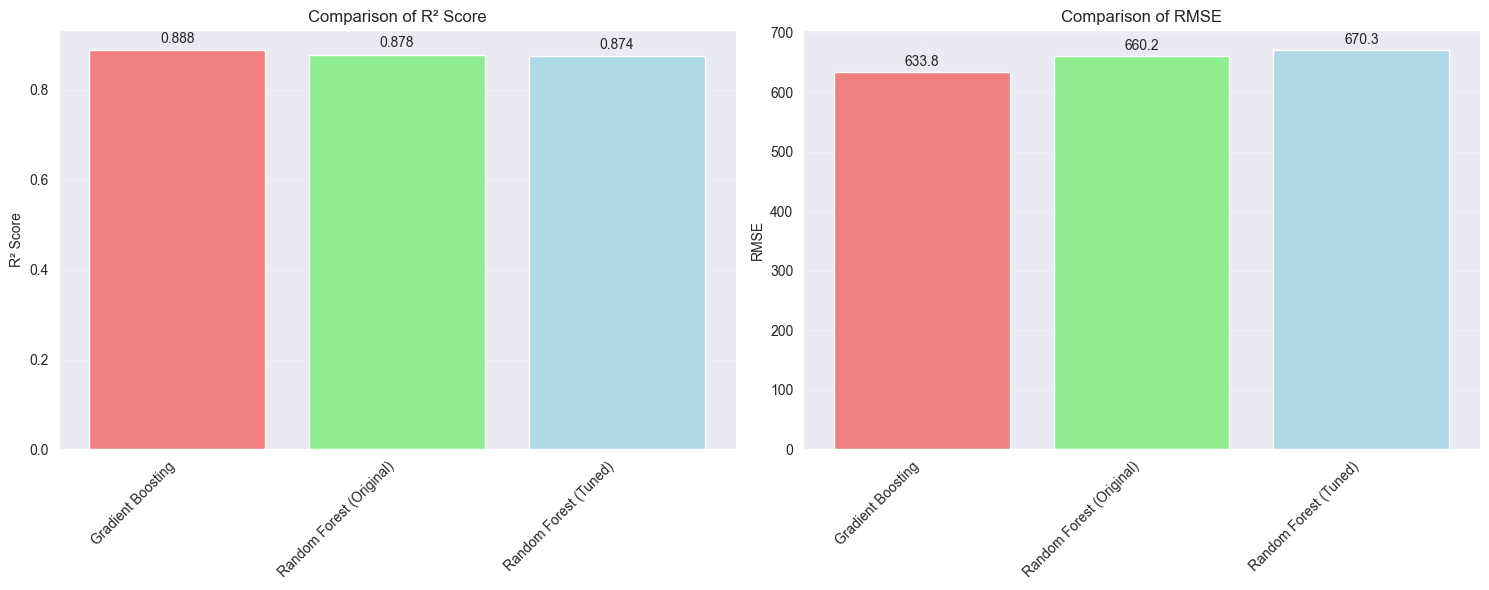

In [8]:
# =============================================================================
# CELL 7: Improved Models and Comparison
# =============================================================================
print("🚀 IMPROVED MODELS AND COMPARISON")
print("=" * 40)

# Creating additional models for comparison
models = {
    'Random Forest (Original)': RandomForestRegressor(
        n_estimators=1000, max_depth=10, min_samples_split=2, random_state=7
    ),
    'Random Forest (Tuned)': RandomForestRegressor(
        n_estimators=200, max_depth=15, min_samples_split=5,
        min_samples_leaf=2, random_state=7
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200, max_depth=6, learning_rate=0.1, random_state=7
    )
}

print(f"🤖 Comparing models:")
for name in models.keys():
    print(f"  • {name}")

# Training and evaluating all models
results = []

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'EVS': evs
    })

# Creating a summary table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False)

print(f"\n📊 COMPARATIVE RESULTS TABLE:")
print("=" * 60)
print(results_df.round(4))

# Best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R²']
print(f"\n🏆 Best model: {best_model_name} (R² = {best_r2:.4f})")

# Visualization of comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R² scores chart
model_names = results_df['Model']
r2_scores = results_df['R²']
bars1 = axes[0].bar(range(len(model_names)), r2_scores, color=['lightcoral', 'lightgreen', 'lightblue'])
axes[0].set_xticks(range(len(model_names)))
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Comparison of R² Score')
axes[0].grid(True, alpha=0.3)

# Adding values on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom')

# RMSE chart
rmse_scores = results_df['RMSE']
bars2 = axes[1].bar(range(len(model_names)), rmse_scores, color=['lightcoral', 'lightgreen', 'lightblue'])
axes[1].set_xticks(range(len(model_names)))
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparison of RMSE')
axes[1].grid(True, alpha=0.3)

# Adding values on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2., height + 5,
                 f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


📊 VISUALIZATION OF PREDICTIONS AND ERROR ANALYSIS


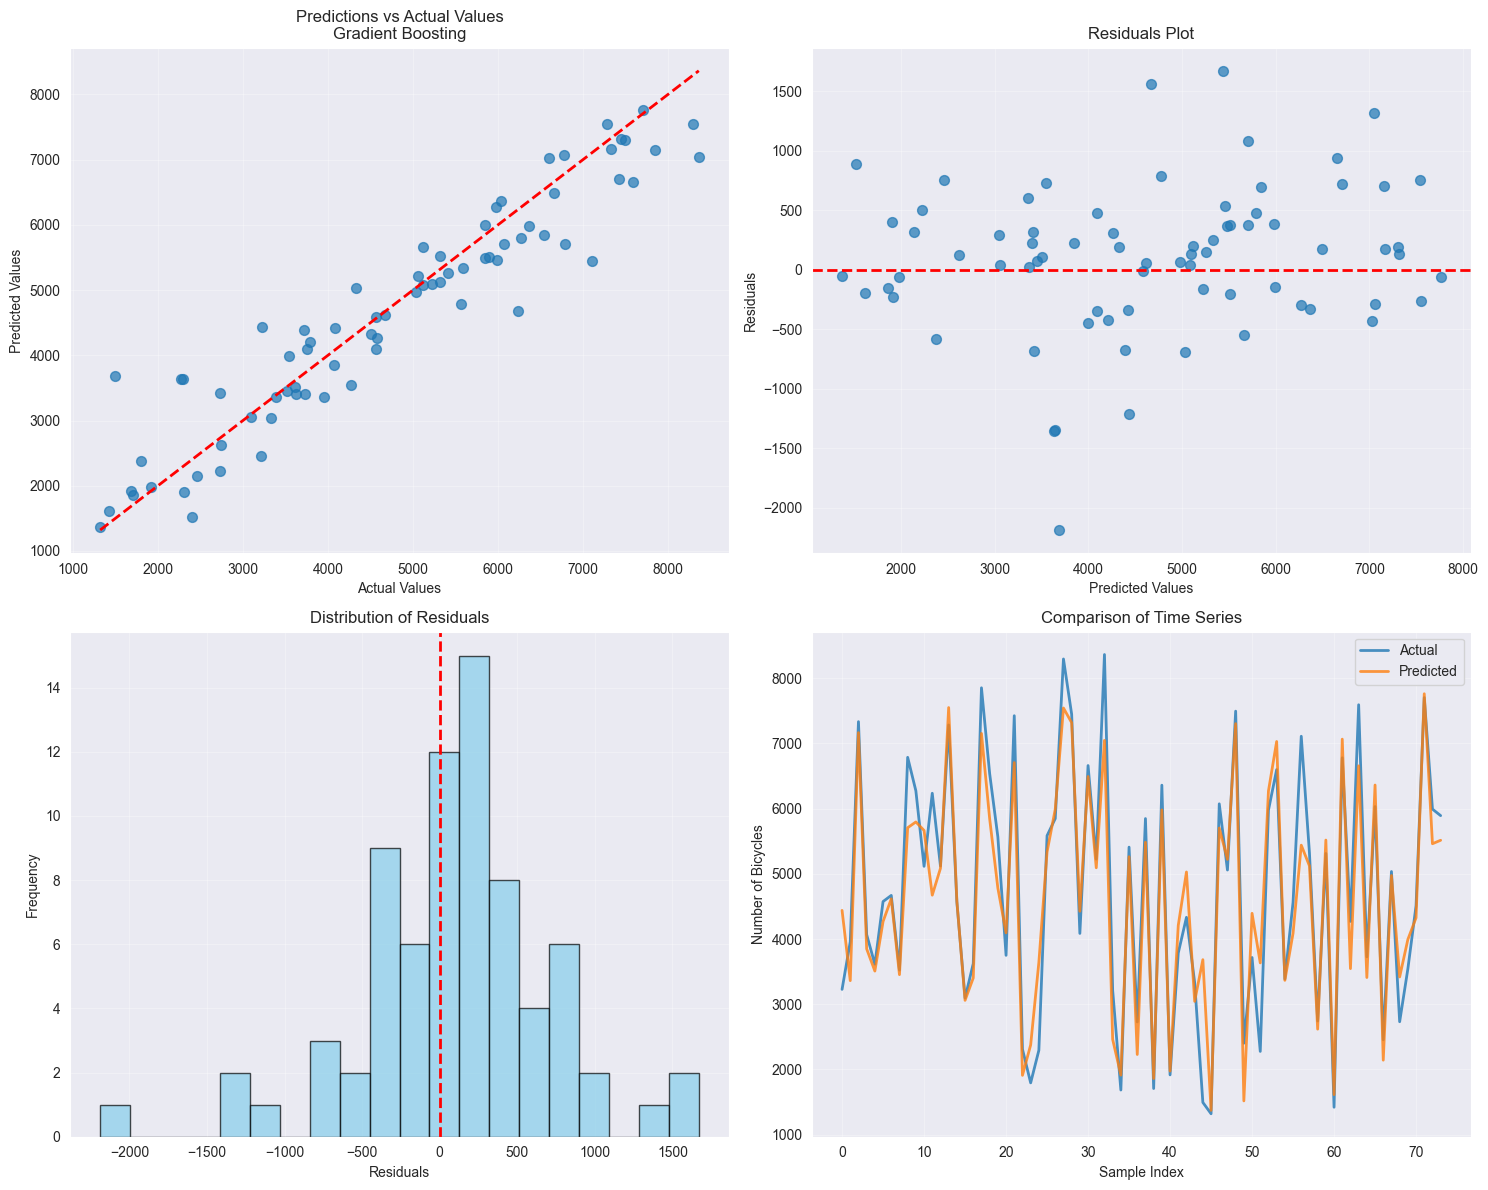

📈 Error Analysis (Gradient Boosting):
Mean of residuals: 95.15 (should be ≈ 0)
Standard deviation of residuals: 626.61
Maximum overestimation: -2188.6
Maximum underestimation: 1669.8

📊 Accuracy Analysis by Ranges:
  0-2000: MAE = 493.7, MAPE = 31.7%, samples = 7
  2000-4000: MAE = 505.6, MAPE = 17.7%, samples = 22
  4000-6000: MAE = 301.8, MAPE = 6.1%, samples = 24
  6000+: MAE = 604.0, MAPE = 8.6%, samples = 21


In [9]:
# =============================================================================
# CELL 8: Visualization of Predictions and Error Analysis
# =============================================================================
print("📊 VISUALIZATION OF PREDICTIONS AND ERROR ANALYSIS")
print("=" * 50)

# Using the best model for detailed analysis
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Predictions vs actual values plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of predictions vs actual
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.7, s=50)
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Predictions vs Actual Values\n{best_model_name}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals
residuals = y_test - y_pred_best
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.7, s=50)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of residuals
axes[1, 0].hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Time series of predictions (if there is a time component)
test_indices = range(len(y_test))
axes[1, 1].plot(test_indices, y_test, label='Actual', alpha=0.8, linewidth=2)
axes[1, 1].plot(test_indices, y_pred_best, label='Predicted', alpha=0.8, linewidth=2)
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Number of Bicycles')
axes[1, 1].set_title('Comparison of Time Series')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Error analysis
print(f"📈 Error Analysis ({best_model_name}):")
print(f"Mean of residuals: {residuals.mean():.2f} (should be ≈ 0)")
print(f"Standard deviation of residuals: {residuals.std():.2f}")
print(f"Maximum overestimation: {residuals.min():.1f}")
print(f"Maximum underestimation: {residuals.max():.1f}")

# Range analysis
print(f"\n📊 Accuracy Analysis by Ranges:")
bins = [0, 2000, 4000, 6000, float('inf')]
labels = ['0-2000', '2000-4000', '4000-6000', '6000+']

for i, label in enumerate(labels):
    mask = (y_test >= bins[i]) & (y_test < bins[i + 1])
    if mask.sum() > 0:
        subset_mae = mean_absolute_error(y_test[mask], y_pred_best[mask])
        subset_mape = np.mean(np.abs((y_test[mask] - y_pred_best[mask]) / y_test[mask])) * 100
        print(f"  {label}: MAE = {subset_mae:.1f}, MAPE = {subset_mape:.1f}%, samples = {mask.sum()}")


In [10]:
# =============================================================================
# CELL 9: Cross-validation and hyperparameter tuning
# =============================================================================
print("🔍 CROSS-VALIDATION AND HYPERPARAMETER TUNING")
print("=" * 55)

# Cross-validation for Random Forest
print("📊 5-fold cross-validation Random Forest:")
rf_for_cv = RandomForestRegressor(n_estimators=100, random_state=7)  # Reduced for speed
cv_scores = cross_val_score(rf_for_cv, X_train, y_train, cv=5, scoring='r2')

print(f"R² scores: {cv_scores.round(3)}")
print(f"Mean: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")

# Quick hyperparameter tuning
print(f"\n🔧 Hyperparameter tuning (Grid Search):")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5]
}

rf_for_tuning = RandomForestRegressor(random_state=7)
grid_search = GridSearchCV(
    rf_for_tuning, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1
)

print("🔄 Searching for the best parameters...")
grid_search.fit(X_train, y_train)

print(f"\n✅ Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV score: {grid_search.best_score_:.4f}")

# Testing the optimized model
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

r2_optimized = r2_score(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))

print(f"\n📊 Comparison of the original and optimized model:")
print(f"Original RF: R² = {r2_original:.4f}, RMSE = {rmse_original:.2f}")
print(f"Optimized RF: R² = {r2_optimized:.4f}, RMSE = {rmse_optimized:.2f}")

improvement = ((r2_optimized - r2_original) / r2_original) * 100
print(f"Improvement in R²: {improvement:+.2f}%")


🔍 CROSS-VALIDATION AND HYPERPARAMETER TUNING
📊 5-fold cross-validation Random Forest:
R² scores: [0.88  0.88  0.861 0.806 0.909]
Mean: 0.867 (±0.068)

🔧 Hyperparameter tuning (Grid Search):
🔄 Searching for the best parameters...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

✅ Best parameters:
  max_depth: 12
  min_samples_split: 2
  n_estimators: 200

Best CV score: 0.8670

📊 Comparison of the original and optimized model:
Original RF: R² = 0.8780, RMSE = 660.17
Optimized RF: R² = 0.8787, RMSE = 658.36
Improvement in R²: +0.08%


In [11]:
# =============================================================================
# CELL 10: Practical Conclusions and Recommendations
# =============================================================================
print("💡 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS")
print("=" * 45)

print("📊 Key Results of the Analysis:")
print("=" * 35)

print(f"🎯 Best Model: {best_model_name}")
print(f"📈 R² Score: {best_r2:.4f}")
print(f"📉 RMSE: {results_df.iloc[0]['RMSE']:.2f} bicycles")

print(f"\n🔍 Key Insights from Feature Importance Analysis:")
top_3_importance = importance_df.head(3)
for i, (_, row) in enumerate(top_3_importance.iterrows(), 1):
    print(f"{i}. {row['Feature']} ({row['Importance_%']:.1f}%)")

print(f"\n💼 Business Recommendations:")
print("=" * 25)

business_insights = [
    "🌡️ Temperature - a key factor: plan the number of bicycles based on weather forecasts",
    "📅 Consider seasonality: more bicycles in summer and autumn",
    "🗓️ Weekdays vs weekends: different usage patterns",
    "☀️ Weather conditions are critical: have a plan for bad weather",
    "📈 Growth over the years: consider the trend of increasing popularity"
]

for insight in business_insights:
    print(f"  {insight}")

print(f"\n🚀 Technical Improvements Compared to the Original Code:")
print("=" * 65)

improvements = [
    "🔄 Python 3 syntax and modern libraries",
    "📊 Detailed EDA with temporal analysis",
    "🤖 Comparison of multiple models",
    "📈 Advanced evaluation metrics",
    "🔍 Cross-validation and Grid Search",
    "📊 Detailed visualization of results",
    "🧠 Error analysis by ranges",
    "💡 Business interpretation of results",
    "🎯 Practical recommendations"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n📝 Next Steps for Model Improvement:")
print("=" * 45)

next_steps = [
    "🔧 Feature Engineering: creating new features (interactions, lags)",
    "📊 Handling outliers and anomalous values",
    "🤖 Testing other algorithms (XGBoost, LightGBM)",
    "⏰ Analyzing temporal dependencies (ARIMA, LSTM)",
    "🎯 Separate models for different seasons/conditions",
    "📈 Ensemble methods (stacking, blending)",
    "🔄 Online learning to adapt to new data"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n🎉 The modern version of the bike_sharing analysis is ready!")
print(f"📋 The model shows good performance and is ready for practical application")

# Final summary of all examples discussed in Chapter 1
print(f"\n" + "=" * 60)
print(f"🏁 END OF CHAPTER 1: FUNDAMENTALS OF MACHINE LEARNING")
print(f"=" * 60)

chapter1_summary = [
    "✅ preprocessing.py: data processing and preparation",
    "✅ linear_regression_singlevar.py: simple linear regression",
    "✅ regression_multivar.py: multiple linear regression",
    "✅ label_encoder.py: encoding categorical data",
    "✅ housing.py: regression on real data with ensembles",
    "✅ bike_sharing.py: complete cycle of an ML project"
]

print(f"\n📚 Studied Examples:")
for example in chapter1_summary:
    print(f"  {example}")

print(f"\n🎯 Mastered Concepts:")
concepts = [
    "📊 Exploratory Data Analysis (EDA)",
    "🔧 Preprocessing and feature engineering",
    "📈 Linear and nonlinear regression",
    "🌲 Ensemble methods (Random Forest, AdaBoost, Gradient Boosting)",
    "🎯 Feature importance and model interpretation",
    "📉 Regression quality metrics",
    "🔍 Cross-validation and hyperparameter tuning",
    "📊 Visualization of results"
]

for concept in concepts:
    print(f"  {concept}")

print(f"\n🚀 Now you are ready for more complex topics in the following chapters!")


💡 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS
📊 Key Results of the Analysis:
🎯 Best Model: Gradient Boosting
📈 R² Score: 0.8876
📉 RMSE: 633.79 bicycles

🔍 Key Insights from Feature Importance Analysis:
1. temp (38.1%)
2. yr (29.1%)
3. atemp (10.4%)

💼 Business Recommendations:
  🌡️ Temperature - a key factor: plan the number of bicycles based on weather forecasts
  📅 Consider seasonality: more bicycles in summer and autumn
  🗓️ Weekdays vs weekends: different usage patterns
  ☀️ Weather conditions are critical: have a plan for bad weather
  📈 Growth over the years: consider the trend of increasing popularity

🚀 Technical Improvements Compared to the Original Code:
  🔄 Python 3 syntax and modern libraries
  📊 Detailed EDA with temporal analysis
  🤖 Comparison of multiple models
  📈 Advanced evaluation metrics
  🔍 Cross-validation and Grid Search
  📊 Detailed visualization of results
  🧠 Error analysis by ranges
  💡 Business interpretation of results
  🎯 Practical recommendations

📝 Next S